In [165]:
## Histogram for image
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [13]:
fname = './data/toothless.jpg'

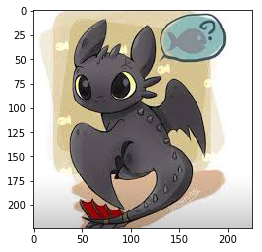

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

image = Image.open(fname)
plt.imshow(image)

(224, 225, 3)

(array([  656.,  1625.,  5359.,  8372.,  2116.,  1975.,   919.,  2083.,
        12307., 14988.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

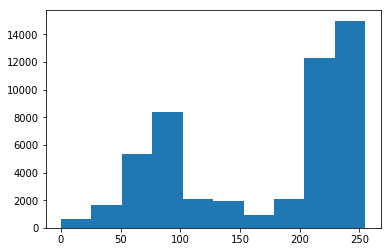

(array([ 1311.,  1815.,  6243.,  7871.,  1017.,  1210.,  2259.,  7600.,
         7628., 13446.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

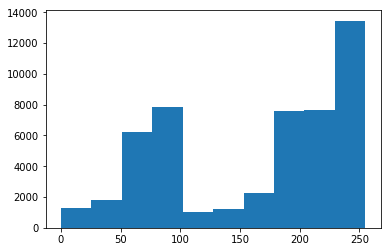

(array([ 1491.,  1773.,  5114.,  8141.,  2188.,  6796.,  4617.,  3939.,
         4749., 11592.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

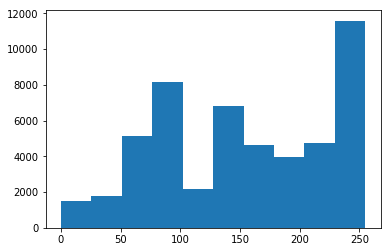

In [4]:
import numpy as np

image_array = np.asarray(image)
image_array.shape

for d in range(3):
    plt.hist(image_array[:,:,d].flatten())
    plt.show()

In [5]:
InteractiveShell.ast_node_interactivity = "none"

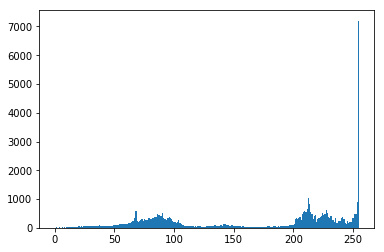

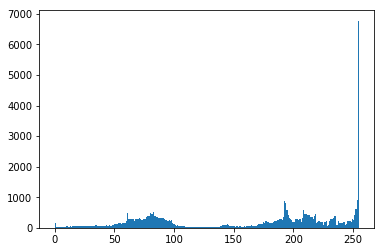

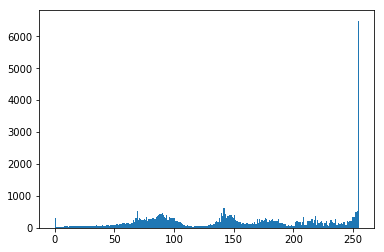

In [6]:
import numpy as np

image_array = np.asarray(image)
image_array.shape

for d in range(3):
    plt.hist(image_array[:,:,d].flatten(), bins=256)
    plt.show()

## Normalise pixel values

### `plot_histogram`

In [199]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_histogram(img, img_type=None, mode=None, img_display=False):
    
    # colour
    if len(img.shape) == 3:
        color = ['g','b','r']
        
        # GBR
        if img_type == 'GBR': 
            for d in range(3):
                plt.hist(img[:,:,d].flatten(), color=color[d], bins=256)

                if mode == 'separate':
                    plt.show()
            
            if mode != 'separate':
                plt.legend(['Green', 'Blue', 'Red'])
                plt.show()

        # HSV
        elif img_type == 'HSV':
            for d in range(3):
                if d == 0: # Hue
                    # hue
                    plt.hist(img[:,:,d].flatten(), color=color[0], bins=180)
                    
                else: # Saturation, Value
                    #print(np.unique(img[:,:,d]))
                    plt.hist(img[:,:,d].flatten(), color=color[d], bins=256)

                if mode == 'separate':
                    plt.show()
                    
            if mode != 'separate':
                plt.legend(['Hue', 'Saturation', 'Value'])
                plt.show() 
                
        # display layers
        if img_display == True:
            #plt.figure(figsize=(10,10))
            #plt.axis('off')
            
            for d in range(3):
                #plt.subplot(1,3,d+1)
                plt.figure(figsize=(5,5))
                plt.imshow(img[:,:,d], cmap='gray')
                plt.show()           
            
    # gray
    else:
        plt.hist(img.flatten(), bins=256); 
        
    return

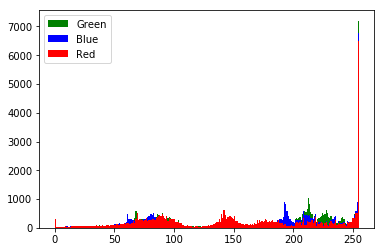

In [127]:
plot_histogram(image_array, img_type='GBR')

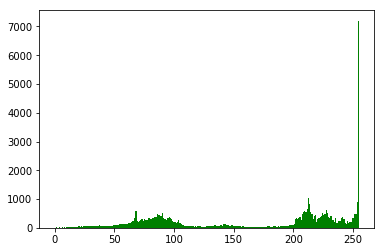

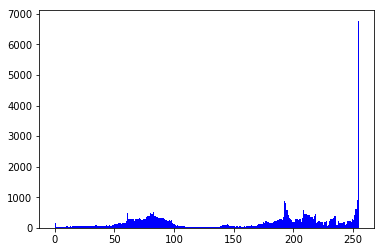

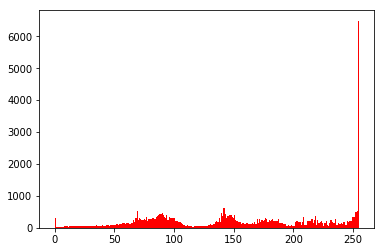

In [128]:
plot_histogram(image_array, img_type='GBR', mode='separate')

In [ ]:
import cv2

img = cv2.imread(fname)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# plot HSV
plt.axis('off')
plt.subplot(1,3,1)
plt.imshow(img[:,:,0], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img[:,:,1], cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img[:,:,2], cmap='gray')
print(img.shape)
        

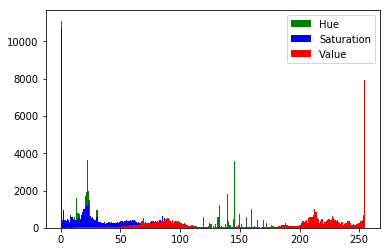

In [130]:
plot_histogram(img, img_type='HSV')

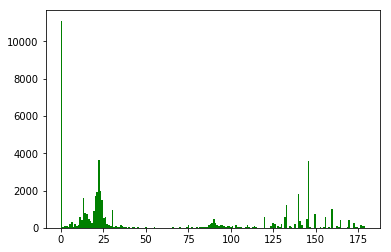

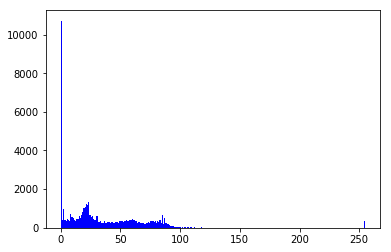

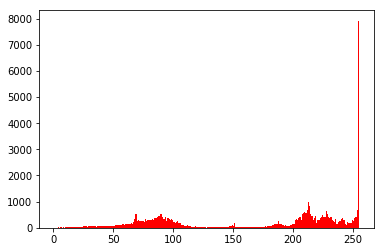

In [131]:
plot_histogram(img, img_type='HSV', mode='separate')

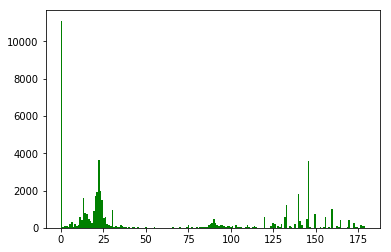

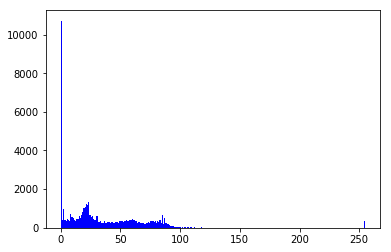

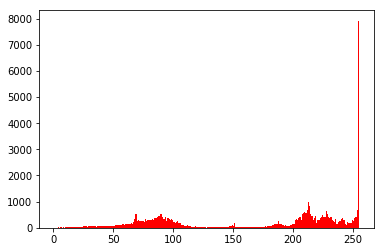

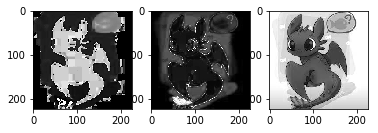

In [132]:
plot_histogram(img, img_type='HSV', mode='separate', img_display=True)

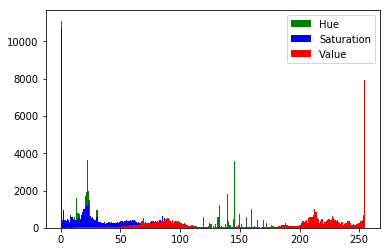

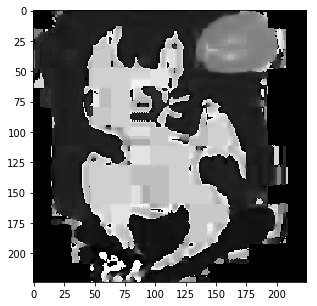

In [ ]:
plot_histogram(img, img_type='HSV', img_display=True)

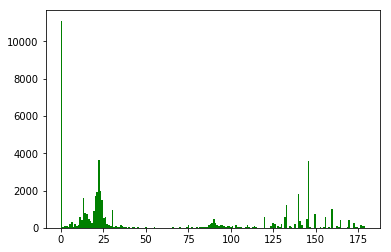

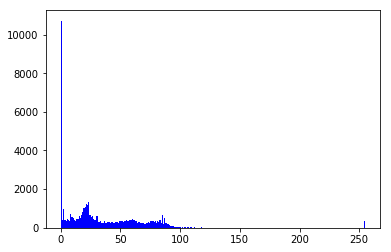

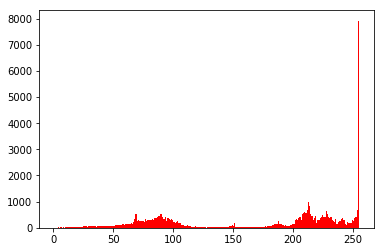

In [134]:
plot_histogram(img, img_type='HSV', mode='separate')

### discribe distribution

In [176]:
from scipy import stats

for i in range(3):
    s = stats.describe(img[:,:,i].flatten())
    print('minmax: ', s.minmax)
    print('mean: ', s.mean)
    print('skewness: ', s.skewness)
    print('kurtosis: ', s.kurtosis)
    print('stddev: ', math.sqrt(s.variance))


minmax:  (0, 179)
mean:  56.41593253968254
skewness:  0.6977772256721718
kurtosis:  -1.255912209293324
stddev:  60.55265064874298
minmax:  (0, 255)
mean:  35.90248015873016
skewness:  2.3467048026898762
kurtosis:  8.585426380892233
stddev:  40.663049500914056
minmax:  (1, 255)
mean:  173.47069444444443
skewness:  -0.48028231375988006
kurtosis:  -1.3621287995731237
stddev:  74.76916555594818


In [204]:
def get_stats_1(img, display=False):
    from scipy import stats
    import math

    s = stats.describe(img.flatten())

    if display == True:
        print('minmax: ', s.minmax)
        print('mean: ', s.mean)
        print('skewness: ', s.skewness)
        print('kurtosis: ', s.kurtosis)
        print('stddev: ', math.sqrt(s.variance))
    return s